In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
transactions = pd.read_csv('G:\\Downloads\\HomeTest 1.KPMG Data.csv', parse_dates= ['transaction_date'])
print (transactions.head())
transactions.info()

   transaction_id  product_id  customer_id transaction_date online_order  \
0               1           2         2950       2017-02-25        False   
1               2           3         3120       2017-05-21         True   
2               3          37          402       2017-10-16        False   
3               4          88         3135       2017-08-31        False   
4               5          78          787       2017-01-10         True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

  list_price standard_cost  product_first_sold_date  
0      71,49        $53,62                  

C:\Users\Laptop88\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '25/02/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Laptop88\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Laptop88\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/10/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Laptop88\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '31/08/2017' in DD/MM/YYYY format. Provide form

In [3]:
transactions= transactions[transactions['order_status']== "Approved"]
transactions=transactions.sort_values('transaction_date')
transactions['transaction_month'] = transactions['transaction_date'].dt.month
transactions=transactions[['customer_id',"transaction_month"]]
print (transactions)

       customer_id  transaction_month
16919          113                  1
15564         2543                  1
9362           871                  1
11467         2686                  1
2275          2843                  1
...            ...                ...
11700         1453                 12
12666         1594                 12
252           3123                 12
19958         1787                 12
4668          1052                 12

[19821 rows x 2 columns]


In [4]:
cohort=transactions.groupby("customer_id")["transaction_month"].min().reset_index()
cohort.rename(columns={'transaction_month':'cohort_month'}, inplace=True)
print (cohort)

      customer_id  cohort_month
0               1             2
1               2             4
2               3             2
3               4             3
4               5             3
...           ...           ...
3488         3497             1
3489         3498             2
3490         3499             1
3491         3500             2
3492         5034             1

[3493 rows x 2 columns]


In [5]:
transactions_cohort = transactions.merge(cohort, on =["customer_id"])
transactions_cohort["cohort_index"] =transactions_cohort['transaction_month']-transactions_cohort['cohort_month']+1
print (transactions_cohort)

       customer_id  transaction_month  cohort_month  cohort_index
0              113                  1             1             1
1              113                  4             1             4
2              113                  4             1             4
3              113                  8             1             8
4              113                 12             1            12
...            ...                ...           ...           ...
19816          872                 12            12             1
19817         2532                 12            12             1
19818         1485                 12            12             1
19819         1485                 12            12             1
19820         1203                 12            12             1

[19821 rows x 4 columns]


In [6]:
cohort_analysis= transactions_cohort.groupby(["cohort_index",'cohort_month'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_analysis.rename(columns={'customer_id':'count_customer'}, inplace=True)
cohort_analysis=cohort_analysis.set_index(["cohort_index", "cohort_month"])
cohort_analysis=cohort_analysis.pivot_table(values ='count_customer', index = "cohort_month", columns ="cohort_index")
print (cohort_analysis)

cohort_index      1      2      3      4      5      6      7      8      9   \
cohort_month                                                                   
1             1343.0  489.0  484.0  478.0  481.0  480.0  526.0  507.0  478.0   
2              802.0  322.0  305.0  328.0  299.0  296.0  322.0  304.0  330.0   
3              502.0  190.0  182.0  190.0  188.0  217.0  196.0  188.0  191.0   
4              308.0  102.0  110.0  128.0  120.0   97.0  131.0  130.0  130.0   
5              215.0   84.0   89.0   86.0   80.0   90.0   66.0   81.0    NaN   
6              118.0   37.0   48.0   50.0   40.0   48.0   46.0    NaN    NaN   
7               80.0   42.0   21.0   30.0   35.0   26.0    NaN    NaN    NaN   
8               54.0   19.0   20.0   22.0   14.0    NaN    NaN    NaN    NaN   
9               34.0   12.0    9.0   16.0    NaN    NaN    NaN    NaN    NaN   
10              21.0    3.0   10.0    NaN    NaN    NaN    NaN    NaN    NaN   
11              12.0    6.0    NaN    Na

In [7]:
cohort_analysis_p =cohort_analysis.divide(cohort_analysis.iloc[:,0],axis= 0) *100
cohort_analysis_p.index ="2017-" + cohort_analysis_p.index.map(str)
print (cohort_analysis_p)

cohort_index     1          2          3          4          5          6   \
cohort_month                                                                 
2017-1        100.0  36.411020  36.038719  35.591958  35.815339  35.740879   
2017-2        100.0  40.149626  38.029925  40.897756  37.281796  36.907731   
2017-3        100.0  37.848606  36.254980  37.848606  37.450199  43.227092   
2017-4        100.0  33.116883  35.714286  41.558442  38.961039  31.493506   
2017-5        100.0  39.069767  41.395349  40.000000  37.209302  41.860465   
2017-6        100.0  31.355932  40.677966  42.372881  33.898305  40.677966   
2017-7        100.0  52.500000  26.250000  37.500000  43.750000  32.500000   
2017-8        100.0  35.185185  37.037037  40.740741  25.925926        NaN   
2017-9        100.0  35.294118  26.470588  47.058824        NaN        NaN   
2017-10       100.0  14.285714  47.619048        NaN        NaN        NaN   
2017-11       100.0  50.000000        NaN        NaN        NaN 

[Text(0, 0.5, '2017-1'),
 Text(0, 1.5, '2017-2'),
 Text(0, 2.5, '2017-3'),
 Text(0, 3.5, '2017-4'),
 Text(0, 4.5, '2017-5'),
 Text(0, 5.5, '2017-6'),
 Text(0, 6.5, '2017-7'),
 Text(0, 7.5, '2017-8'),
 Text(0, 8.5, '2017-9'),
 Text(0, 9.5, '2017-10'),
 Text(0, 10.5, '2017-11'),
 Text(0, 11.5, '2017-12')]

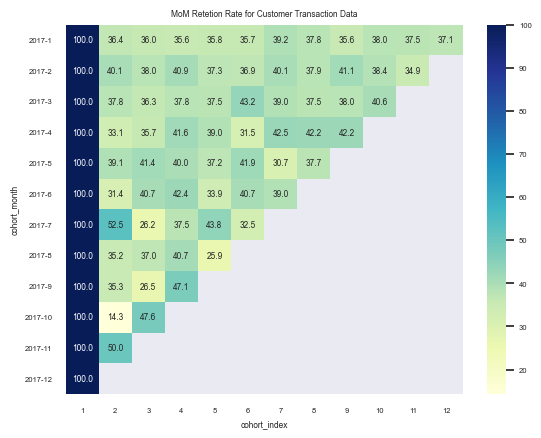

In [8]:
sns.set(font_scale =0.5)
g = sns.heatmap(cohort_analysis_p, annot= True, cmap ="YlGnBu", fmt =".1f")
g.set_title("MoM Retetion Rate for Customer Transaction Data")
g.set_yticklabels(g.get_yticklabels(), rotation=0)